# MLOps Experimental Learning Assignment 
#### End-to-End ML Model Development, CI/CD, and Production Deployment Experimental Learning

# ASSIGNMENT - 1
### Group - 116 : MLOps - S1-25_AIMLCZG523

### STUDENT ID & STUDENT NAME
##### 2024aa05965 -------------- K. ROMA PAI 100%
##### 2024ab05074 -------------- VARNIKA VERMA. 100%
##### 2024aa05828 -------------- KANDI GURURAJARAO 100%
##### 2024ab05330 -------------- KARTHIK REDDY S 0%
##### 2024aa05926 -------------- KUNAL GAURAW 0%

## STEP 1: Data Acquisition & Exploratory Data Analysis (EDA)

#### Data Acquisition

In [1]:
# DATA ACQUISITION

import os
import urllib.request

# Create data directory safely
os.makedirs("data", exist_ok=True)

# UCI Heart Disease dataset URL
DATA_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
DATA_PATH = "data/processed.cleveland.data"

# Download dataset
urllib.request.urlretrieve(DATA_URL, DATA_PATH)

print("Dataset downloaded successfully at:", DATA_PATH)


Dataset downloaded successfully at: data/processed.cleveland.data


#### Data Loading & Cleaning

In [2]:
# DATA LOADING

import pandas as pd
import numpy as np

# Column names as per UCI documentation
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

# Load dataset
df = pd.read_csv(DATA_PATH, names=columns)

# Replace missing values symbol
df.replace("?", np.nan, inplace=True)

# Convert all columns to numeric
df = df.apply(pd.to_numeric)

# Fill missing values using median
df.fillna(df.median(), inplace=True)

print("Data loaded and cleaned")
df.head()


Data loaded and cleaned


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


#### Exploratory Data Analysis

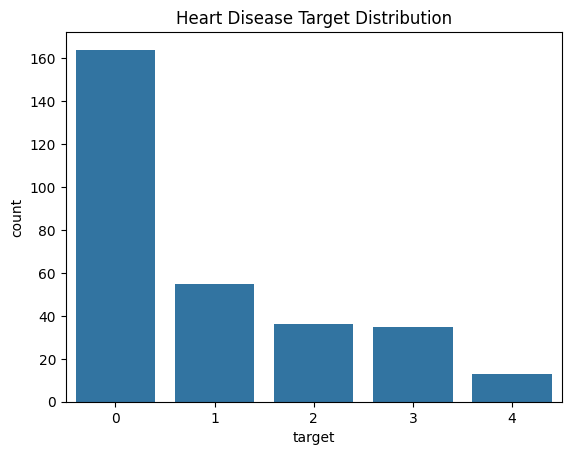

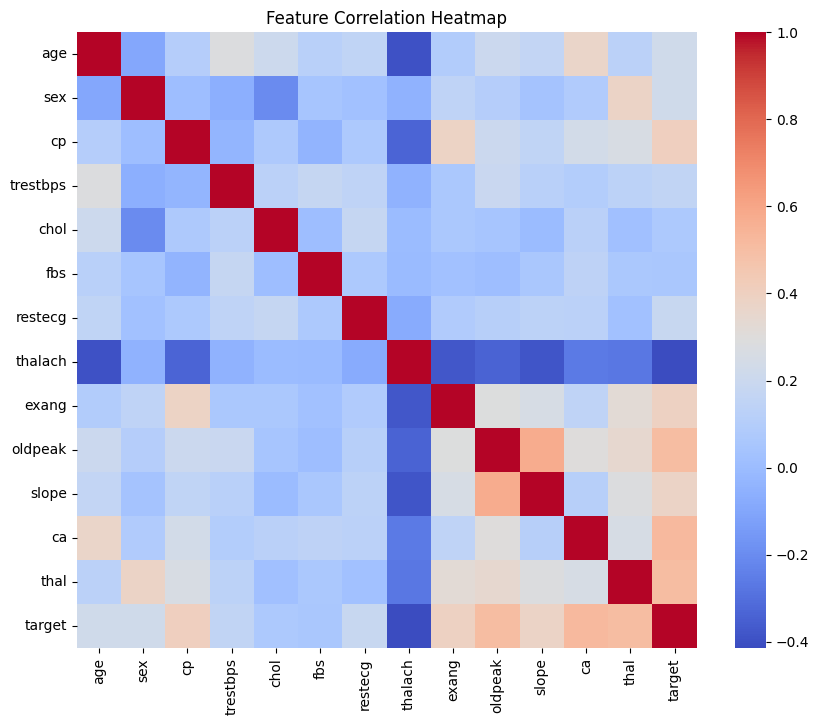

In [3]:
# EDA

import matplotlib.pyplot as plt
import seaborn as sns

# Target class distribution
sns.countplot(x="target", data=df)
plt.title("Heart Disease Target Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


### STEP 2: Feature Engineering & Model Development

#### Feature Engineering

In [4]:
#  FEATURE ENGINEERING

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df.drop("target", axis=1)
y = df["target"]

numeric_features = X.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features)
    ]
)

print("Feature engineering pipeline created")


Feature engineering pipeline created


#### Model Training & Evaluation

In [5]:
# MODEL TRAINING & EVALUATION

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42)
}

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("model", model)
    ])
    
    scores = cross_val_score(
        pipeline, X, y, cv=5, scoring="roc_auc"
    )
    
    print(f"{name} ROC-AUC: {scores.mean():.4f}")


LogisticRegression ROC-AUC: nan


/Users/BITS/Library/Python/3.10/lib/python/site-packages/sklearn/model_selection/_validation.py:971: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/BITS/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_scorer.py", line 152, in __call__
    score = scorer._score(
  File "/Users/BITS/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/BITS/Library/Python/3.10/lib/python/site-packages/sklearn/utils/_param_validation.py", line 218, in wrapper
    return func(*args, **kwargs)
  File "/Users/BITS/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_ranking.py", line 679, in roc_auc_score
    raise ValueError("multi_class must be in ('ovo', 'ovr')")
ValueError: multi_class must be in ('ovo', 'ovr')

  warnings.warn(
/User

RandomForest ROC-AUC: nan


/Users/BITS/Library/Python/3.10/lib/python/site-packages/sklearn/model_selection/_validation.py:971: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/BITS/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_scorer.py", line 152, in __call__
    score = scorer._score(
  File "/Users/BITS/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/BITS/Library/Python/3.10/lib/python/site-packages/sklearn/utils/_param_validation.py", line 218, in wrapper
    return func(*args, **kwargs)
  File "/Users/BITS/Library/Python/3.10/lib/python/site-packages/sklearn/metrics/_ranking.py", line 679, in roc_auc_score
    raise ValueError("multi_class must be in ('ovo', 'ovr')")
ValueError: multi_class must be in ('ovo', 'ovr')

  warnings.warn(
/User

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "log_reg": LogisticRegression(max_iter=2000),
    "random_forest": RandomForestClassifier(n_estimators=200, random_state=42),
}

results = {}
for name, clf in models.items():
    pipe = Pipeline([("preprocessing", preprocessor), ("model", clf)])
    scores = cross_val_score(pipe, X, (y > 0).astype(int), cv=cv, scoring="roc_auc")
    results[name] = (scores.mean(), scores.std())

results


{'log_reg': (np.float64(0.9116306918390251), np.float64(0.017793791227434172)),
 'random_forest': (np.float64(0.9125443422318421),
  np.float64(0.025677502481803168))}

### STEP 3: Experiment Tracking with MLflow

In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import roc_auc_score

y_bin = (y > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_bin, test_size=0.2, random_state=42, stratify=y_bin
)

mlflow.set_experiment("Heart Disease Prediction")

for name, clf in models.items():
    with mlflow.start_run(run_name=name):

        pipe = Pipeline([("preprocessing", preprocessor), ("model", clf)])
        pipe.fit(X_train, y_train)

        y_prob = pipe.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)

        mlflow.log_param("model_name", name)
        # log a couple of key params
        if name == "random_forest":
            mlflow.log_param("n_estimators", clf.n_estimators)
        if name == "log_reg":
            mlflow.log_param("max_iter", clf.max_iter)

        mlflow.log_metric("roc_auc", roc_auc)
        mlflow.sklearn.log_model(pipe, "model")

        print(name, "ROC-AUC:", roc_auc)


2026/01/06 15:01:56 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/01/06 15:01:56 INFO mlflow.store.db.utils: Updating database tables
2026/01/06 15:01:56 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/06 15:01:56 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/01/06 15:01:56 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/06 15:01:56 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/01/06 15:01:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/01/06 15:01:59 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


log_reg ROC-AUC: 0.9512987012987013
random_forest ROC-AUC: 0.9550865800865801


### STEP 4: Model Packaging & Reproducibility

In [8]:
# ================================
# FINAL TRAIN + SAVE PIPELINE
# ================================

import joblib
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Binary target: 1 = disease present, 0 = no disease
y_bin = (y > 0).astype(int)

final_model = RandomForestClassifier(n_estimators=200, random_state=42)

final_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", final_model)
])

final_pipeline.fit(X, y_bin)

joblib.dump(final_pipeline, "heart_disease_pipeline.joblib")
print("Saved model pipeline -> heart_disease_pipeline.joblib")

Saved model pipeline -> heart_disease_pipeline.joblib


### STEP 5: Create a sample input JSON (you will need it for /predict)

In [9]:
# ================================
# SAMPLE INPUT JSON FOR API TESTING
# ================================

import json

sample_request = {
    "age": 57,
    "sex": 1,
    "cp": 0,
    "trestbps": 140,
    "chol": 241,
    "fbs": 0,
    "restecg": 1,
    "thalach": 123,
    "exang": 1,
    "oldpeak": 0.2,
    "slope": 1,
    "ca": 0,
    "thal": 2
}

with open("sample_request.json", "w") as f:
    json.dump(sample_request, f, indent=2)

print("Saved -> sample_request.json")
sample_request


Saved -> sample_request.json


{'age': 57,
 'sex': 1,
 'cp': 0,
 'trestbps': 140,
 'chol': 241,
 'fbs': 0,
 'restecg': 1,
 'thalach': 123,
 'exang': 1,
 'oldpeak': 0.2,
 'slope': 1,
 'ca': 0,
 'thal': 2}

In [10]:
# ================================
# QUICK SANITY CHECK
# ================================

import pandas as pd

loaded = joblib.load("heart_disease_pipeline.joblib")

df = pd.DataFrame([sample_request])
prob = loaded.predict_proba(df)[0][1]
pred = int(prob >= 0.5)

print("Prediction (0=no disease, 1=disease):", pred)
print("Confidence (prob of disease):", float(prob))


Prediction (0=no disease, 1=disease): 0
Confidence (prob of disease): 0.305
